In [1]:
import numpy as np 
import scanpy as sc 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import anndata as ad 
import scanpy.external as sce 


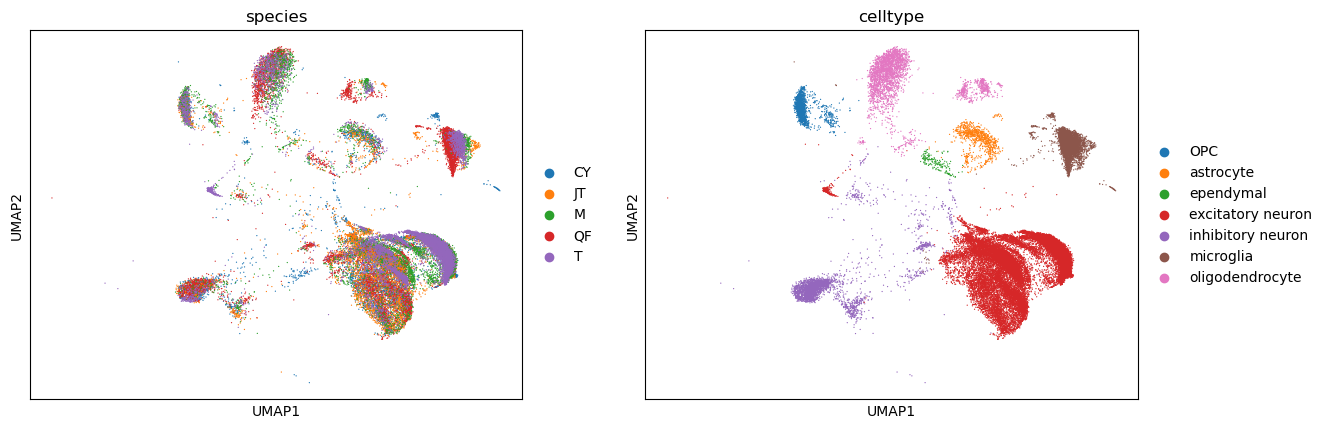

In [2]:
scdata = sc.read_h5ad('hmdata_full.h5ad')
sc.pl.umap(scdata, color = ['species','celltype'])

(36611, 3000)


d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


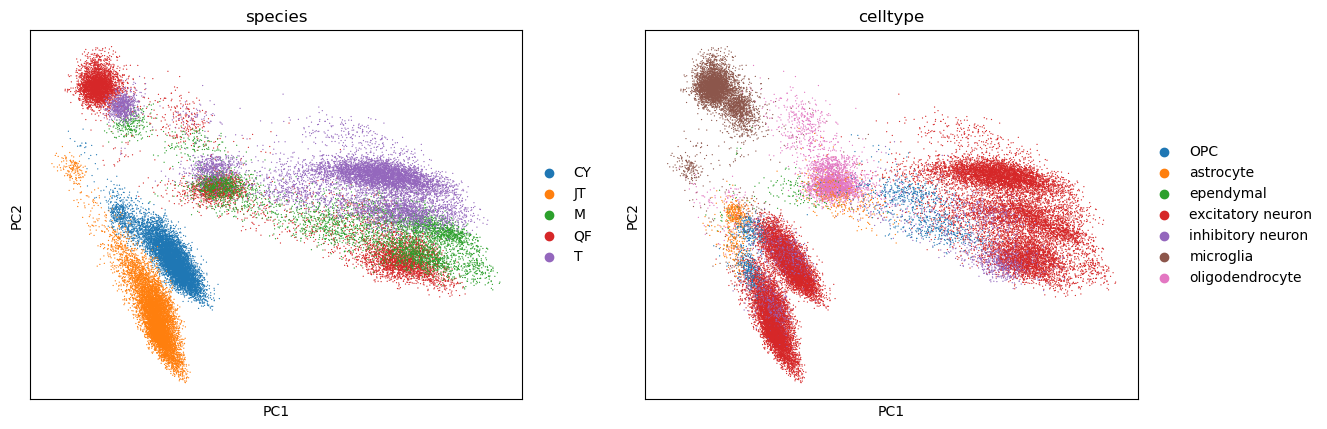

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


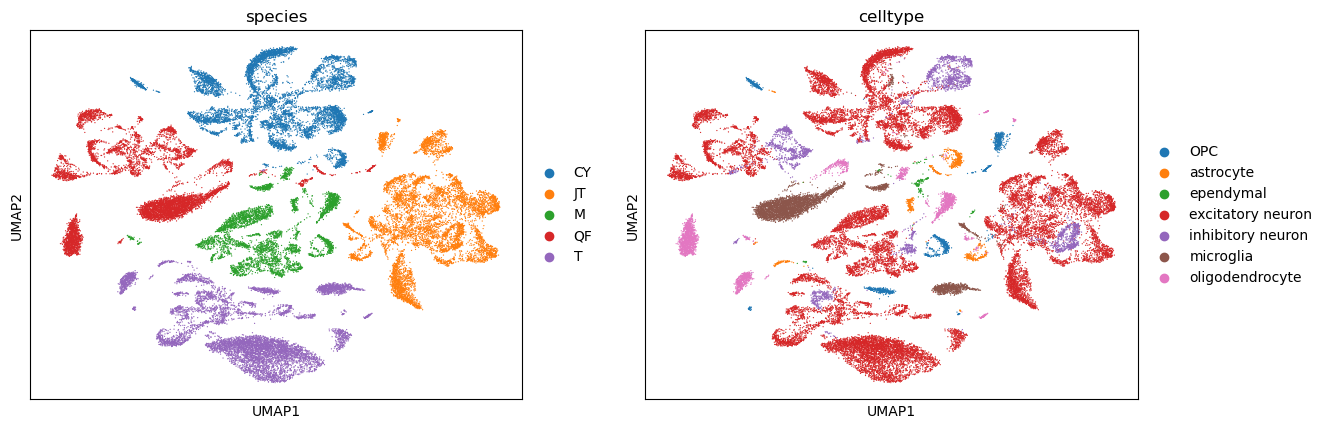

In [4]:
sc.pp.highly_variable_genes(scdata, n_top_genes=3000)
scdata = scdata[:, scdata.var.highly_variable]
print(scdata.shape)

sc.tl.pca(scdata)
sc.pl.pca(scdata, color = ['species','celltype'])
sc.pp.neighbors(scdata, n_neighbors=10, n_pcs=30)
sc.tl.umap(scdata)
sc.pl.umap(scdata, color = ['species','celltype'])

2025-02-17 16:03:54,399 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-02-17 16:03:58,580 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-02-17 16:03:58,837 - harmonypy - INFO - Iteration 1 of 20
2025-02-17 16:04:13,919 - harmonypy - INFO - Iteration 2 of 20
2025-02-17 16:04:29,031 - harmonypy - INFO - Iteration 3 of 20
2025-02-17 16:04:44,046 - harmonypy - INFO - Iteration 4 of 20
2025-02-17 16:04:58,899 - harmonypy - INFO - Iteration 5 of 20
2025-02-17 16:05:13,735 - harmonypy - INFO - Iteration 6 of 20
2025-02-17 16:05:29,936 - harmonypy - INFO - Iteration 7 of 20
2025-02-17 16:05:45,302 - harmonypy - INFO - Iteration 8 of 20
2025-02-17 16:05:59,916 - harmonypy - INFO - Iteration 9 of 20
2025-02-17 16:06:12,539 - harmonypy - INFO - Iteration 10 of 20
2025-02-17 16:06:27,426 - harmonypy - INFO - Iteration 11 of 20
2025-02-17 16:06:33,421 - harmonypy - INFO - Iteration 12 of 20
2025-02-17 16:06:38,777 - harmonypy - INFO - Iteration 13 of

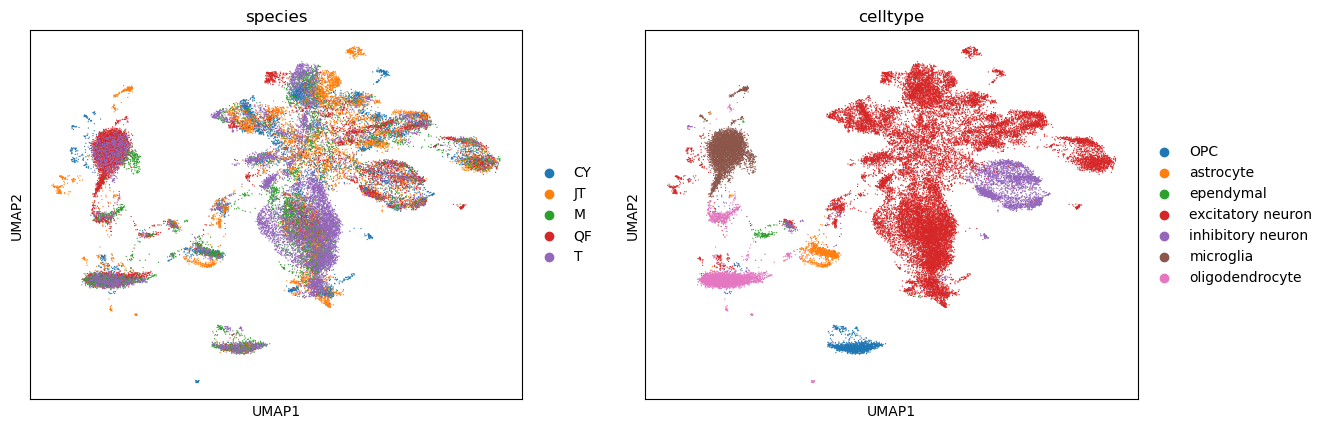

In [5]:
import scanpy.external as sce 

sce.pp.harmony_integrate(scdata, 
                         key = ['species'],
                         max_iter_harmony = 20, 
                         sigma = 0.1, 
                         random_state = 0,
                         theta =2)

sc.pp.neighbors(scdata, use_rep = 'X_pca_harmony')
sc.tl.umap(scdata)
sc.pl.umap(scdata, color = ['species', 'celltype'])


In [6]:
scdata.write_h5ad('hmdata_full_harmony.h5ad')

In [ ]:
scdata

AnnData object with n_obs × n_vars = 36611 × 3000
    obs: 'species', 'tissues', 'samples', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster', 'celltype', 'coarse_celltype'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'cluster_colors', 'coarse_celltype_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'samples_colors', 'species_colors', 'tissues_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'harmony_0', 'umap_0'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

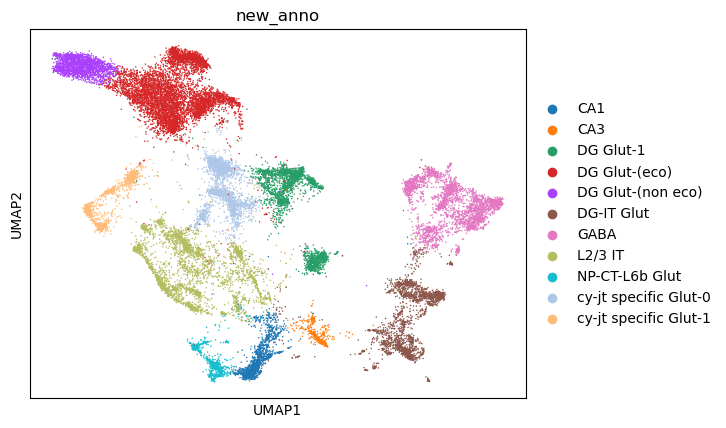

In [2]:
scdata = sc.read_h5ad('final_hvg.h5ad')
sc.pl.umap(scdata, color = 'new_anno')

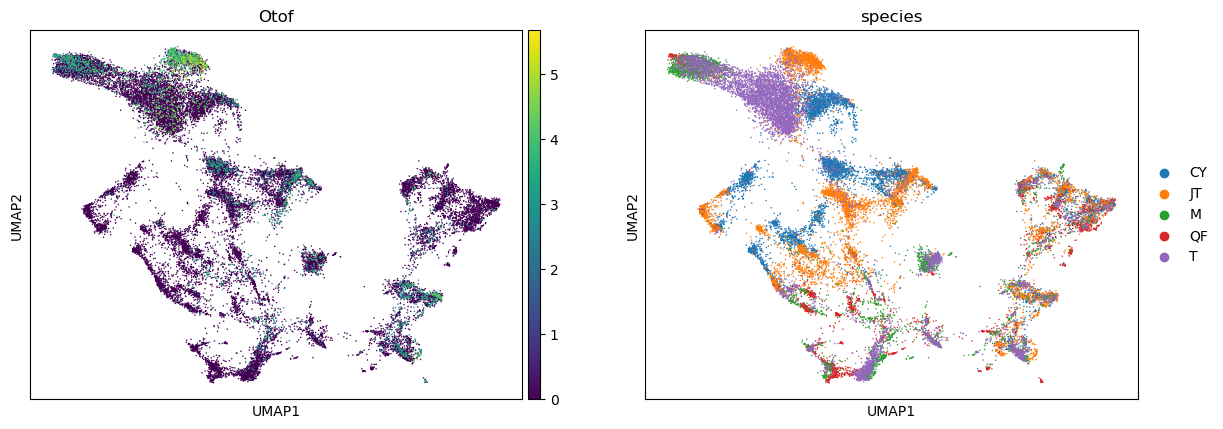

In [5]:
sc.pl.umap(scdata, color = ['Otof','species'])

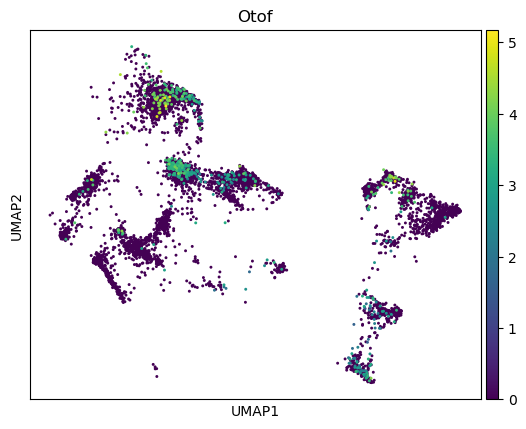

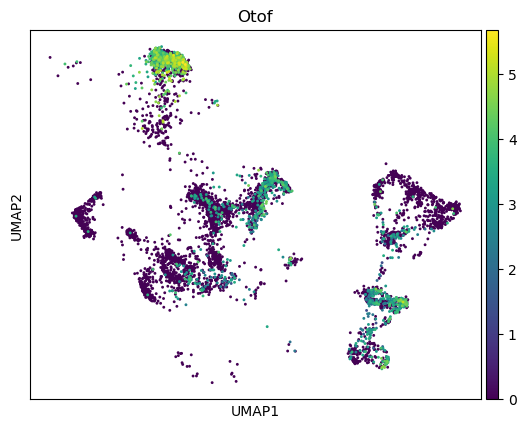

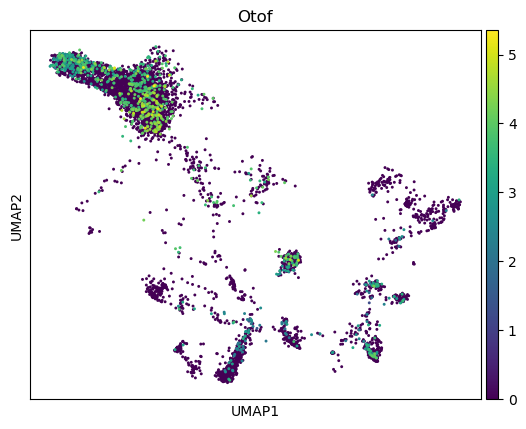

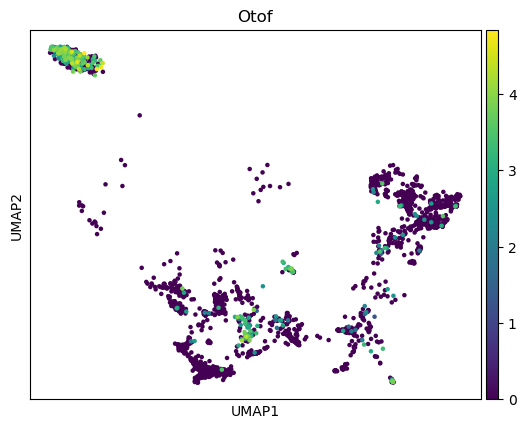

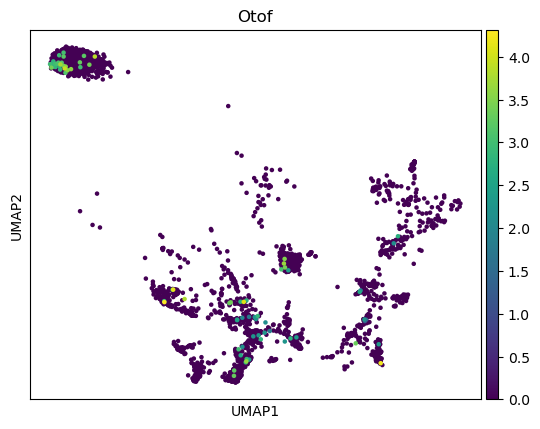

In [8]:
for key in ['CY','JT','T','QF','M']:

    sc.pl.umap(scdata[scdata.obs.species == key], color = ['Otof' ])

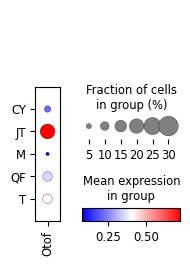

In [7]:
sc.pl.dotplot(scdata,
              groupby = 'species',
              use_raw = True,
              var_names = 'Otof',
              cmap='bwr',)

In [22]:
import os
result = []
save_dir = 'sly_req'
os.makedirs(save_dir, exist_ok=True)

gene_names = scdata.raw.var.index.values

for celltype in scdata.obs.new_anno.unique():
    

    mean_counts = {}
    subdata = scdata[scdata.obs.new_anno == celltype]

    for key in ['CY','JT','M','QF','T']:
        tmp = subdata[subdata.obs.species == key]
        if len(tmp) > 0:
            mean_counts[key] = np.array(tmp.raw.X.mean(axis = 0)).reshape(-1)
        else:
            mean_counts[key] = np.empty(gene_names.shape[0]).fill(np.nan)
    celltype = celltype.replace('/', ' ')
    mean_df = pd.DataFrame(mean_counts, index = gene_names)
    mean_df.to_csv(os.path.join(save_dir, f'{celltype}.csv'))

In [16]:
mean_df

CY        JT         M        QF         T
0     0.006043  0.000000  0.025021  0.000000  0.000000
1     1.046590  1.053960  0.485185  0.958294  1.131453
2     0.074058  0.008757  0.000000  0.000000  0.011891
3     0.668469  0.226129  0.000000  0.744624  0.000000
4     5.247704  4.300824  3.669976  4.219284  2.368018
...        ...       ...       ...       ...       ...
9910  0.057123  0.000000  2.076246  0.000000  0.009416
9911  0.661948  1.534757  0.607771  1.308674  0.973261
9912  0.012829  0.012221  0.000000  0.021724  0.054023
9913  1.773854  2.397331  1.561917  1.995614  2.405272
9914  1.732301  1.685769  1.785242  1.805653  2.284108

[9915 rows x 5 columns]

In [7]:
mean_counts

{'CY': matrix([[0.00604281, 1.04659   , 0.07405773, ..., 0.0128293 , 1.773854  ,
          1.7323005 ]], dtype=float32),
 'JT': matrix([[0.        , 1.0539598 , 0.00875724, ..., 0.01222072, 2.397331  ,
          1.6857687 ]], dtype=float32),
 'M': matrix([[0.02502139, 0.48518524, 0.        , ..., 0.        , 1.5619174 ,
          1.7852421 ]], dtype=float32),
 'QF': matrix([[0.        , 0.9582941 , 0.        , ..., 0.02172405, 1.9956143 ,
          1.8056531 ]], dtype=float32),
 'T': matrix([[0.        , 1.1314526 , 0.01189124, ..., 0.05402307, 2.4052718 ,
          2.2841082 ]], dtype=float32)}

(8221, 2670)


d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


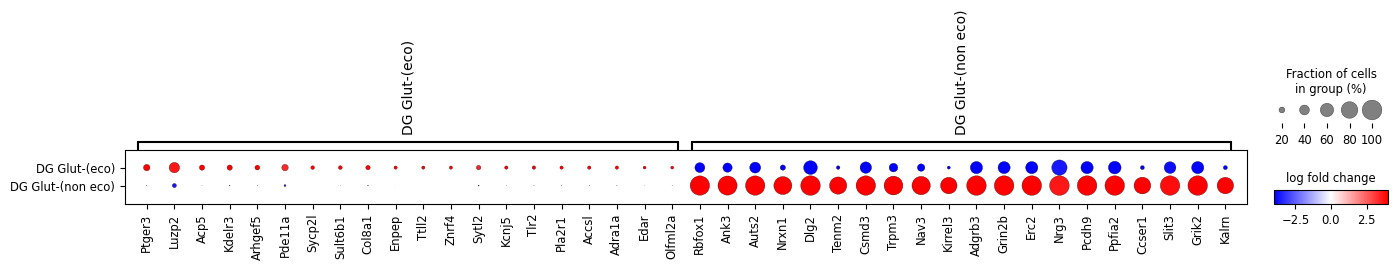

In [12]:
subdata = scdata[scdata.obs.new_anno.isin(['DG Glut-(eco)', 'DG Glut-(non eco)'])]
print(subdata.shape)

sc.tl.rank_genes_groups(subdata, groupby = 'new_anno', use_raw=True)#, method = 'logreg')


sc.pl.rank_genes_groups_dotplot(subdata,
                                n_genes=20,
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=3,   
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')


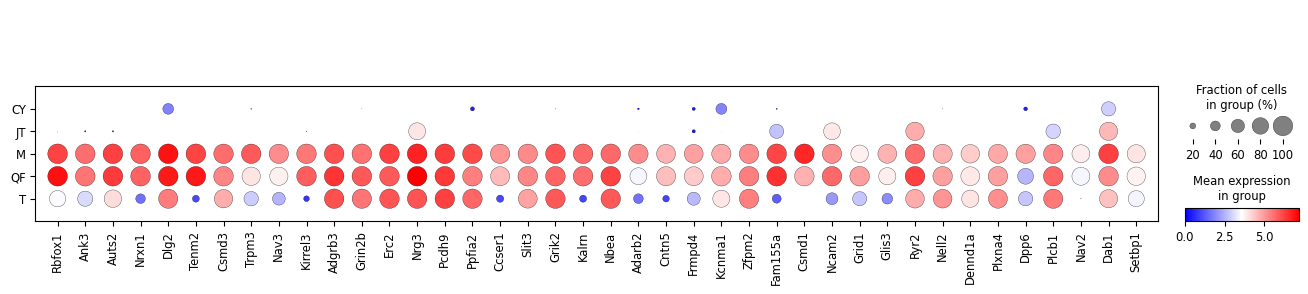

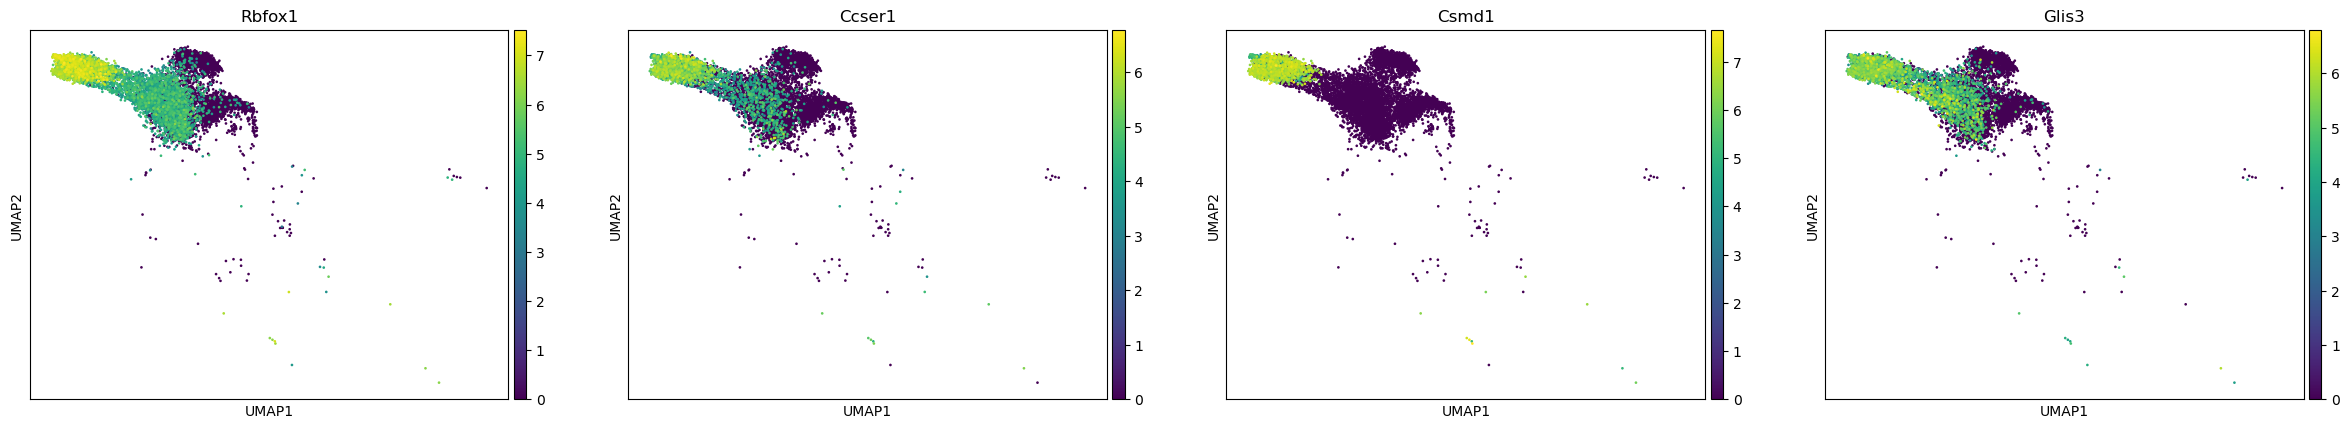

In [62]:
sc.pl.dotplot(subdata,
              groupby = 'species',
              use_raw = True,
              var_names = degs.iloc[9915:9955,1].values,
              cmap='bwr',)

sc.pl.umap(subdata, color = ['Rbfox1', 'Ccser1', 'Csmd1', 'Glis3'])

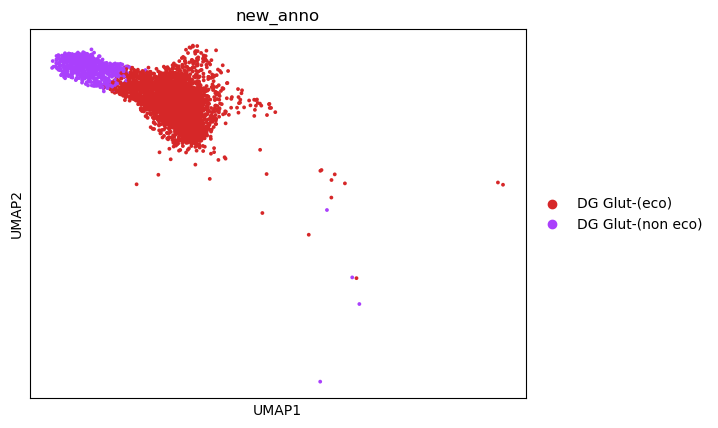

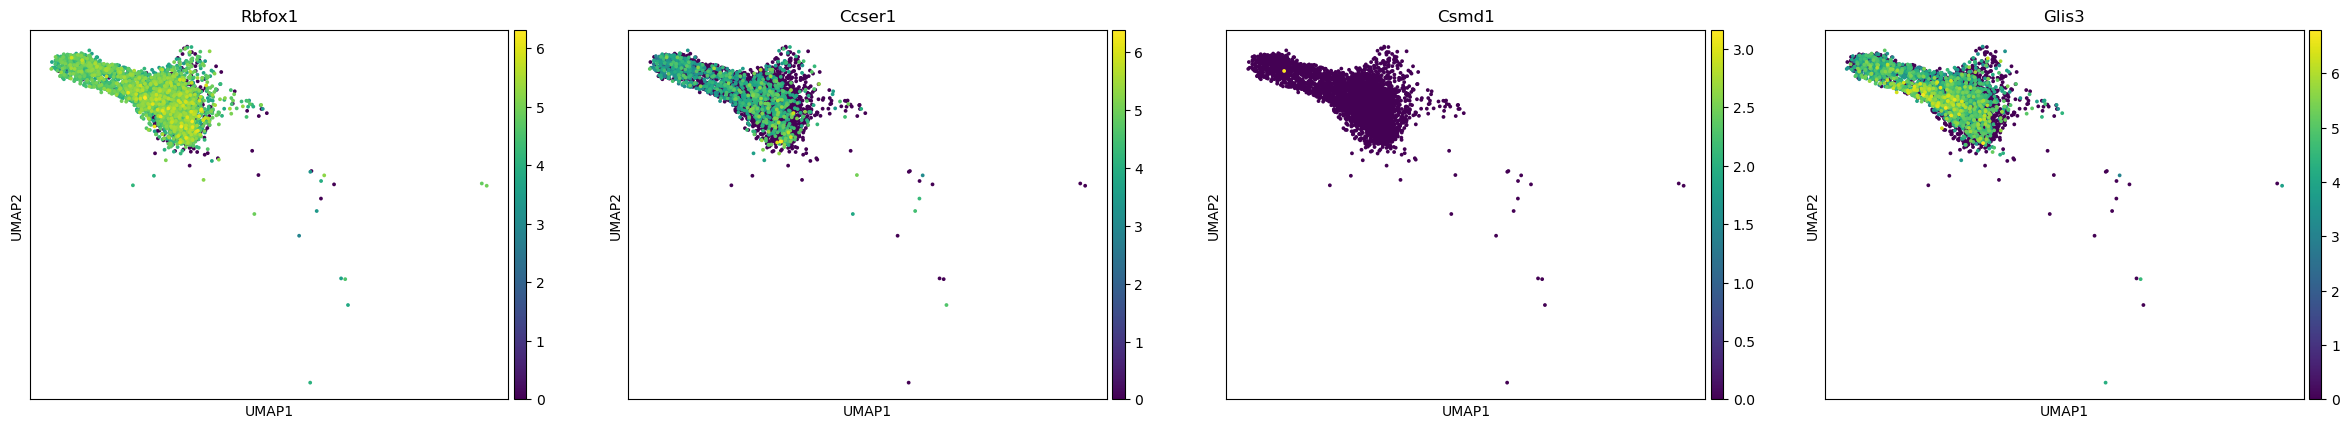

In [67]:
sc.pl.umap(subdata[subdata.obs.species == 'T'], color = 'new_anno')
sc.pl.umap(subdata[subdata.obs.species == 'T'], color = ['Rbfox1', 'Ccser1', 'Csmd1', 'Glis3'])

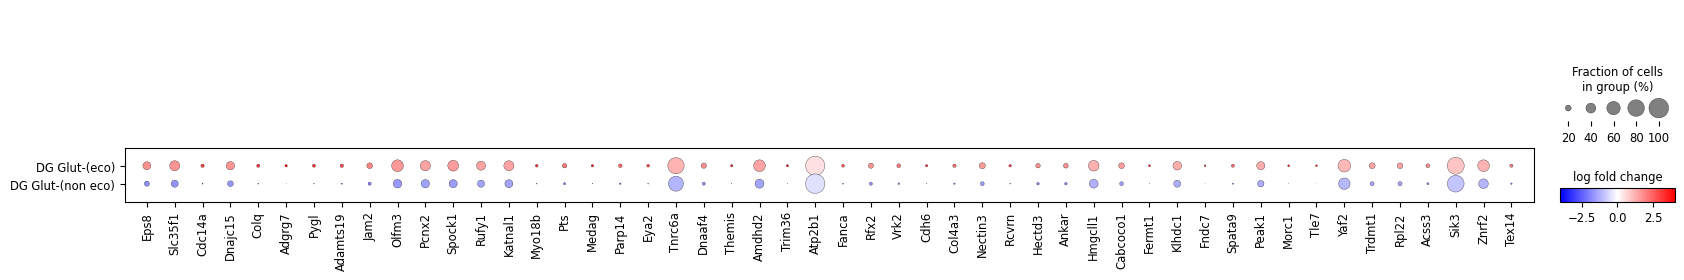

In [ ]:
up_genes = ['Luzp2','Atp8a2','Edil3','Sik3']

# get deg result
degs = sc.get.rank_genes_groups_df(subdata, group =['DG Glut-(eco)', 'DG Glut-(non eco)'] )
sc.pl.rank_genes_groups_dotplot(subdata,
                                var_names = degs.iloc[50:100,1].values,
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=1,   
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')

In [24]:
import gseapy as gp
import time



# get deg result
degs = sc.get.rank_genes_groups_df(subdata, group =['DG Glut-(eco)', 'DG Glut-(non eco)'] )



print('eco gsea' + '===='*20)

degs_sig = degs[degs.pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.logfoldchanges > 1]
print(f'up deg num {degs_up.shape}')

eco gsea================================================================================
up deg num (3293, 6)


d:\Anaconda\envs\scanpy-1.10\lib\site-packages\gseapy\plot.py:604: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
d:\Anaconda\envs\scanpy-1.10\lib\site-packages\gseapy\plot.py:604: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


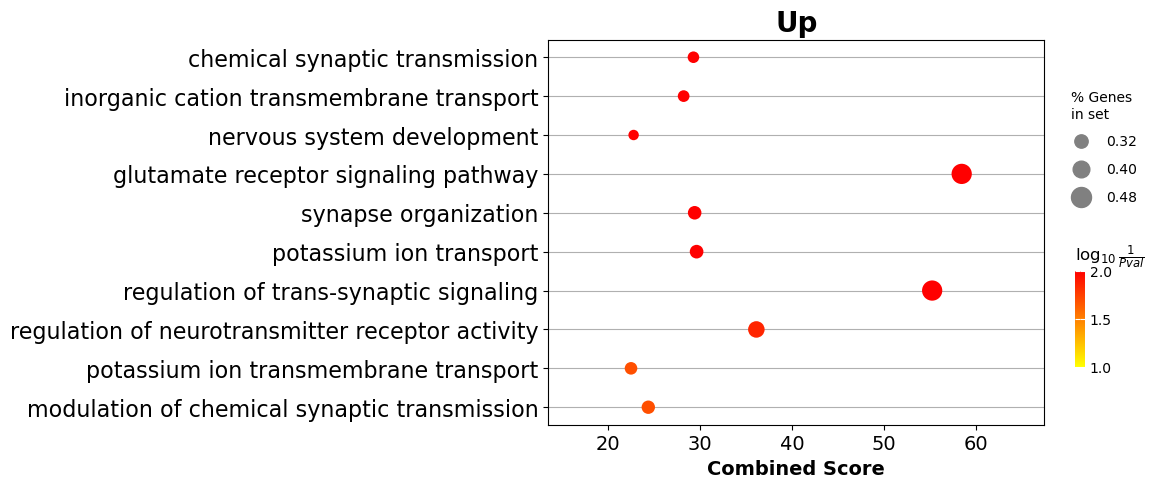

In [25]:
# Enricr API
enr_up = gp.enrichr(degs_up.names,
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)

# trim (go:...)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0] 
# dotplot

gp.dotplot(enr_up.res2d, figsize=(8,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

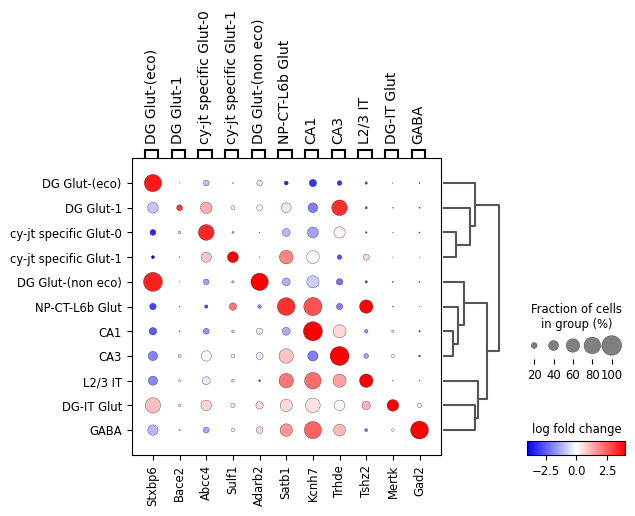

In [60]:
marker_dic = {
    'DG Glut-(eco)': ['Stxbp6'],
    'DG Glut-1': ['Bace2'], #'Trhde', 
    'cy-jt specific Glut-0': ['Abcc4'],
    'cy-jt specific Glut-1': ['Sulf1'],
    'DG Glut-(non eco)': ['Adarb2'],
    'NP-CT-L6b Glut': ['Satb1'], #Sox5
    'CA1': ['Kcnh7'],
    'CA3': ['Trhde'],
    'L2/3 IT': ['Tshz2'],
    'DG-IT Glut': ['Mertk'],
    'GABA': ['Gad2'],
}


#scdata.obs['new_anno'] = scdata.obs['new_anno'].cat.reorder_categories(
#    ['L2/3 IT', 'DG-IT Glut', 'GABA', 'cy-jt specific Glut-0',
#     'cy-jt specific Glut-1', 'DG Glut-1','DG Glut-(eco)', 'NP-CT-L6b Glut',
#     'DG Glut-(non eco)', 'CA1','CA3'],
#     ordered = True
#)

sc.pl.rank_genes_groups_dotplot(
    scdata,
    var_names=marker_dic,
    values_to_plot="logfoldchanges",
    cmap='bwr',
    vmin=-4,
    vmax=4,
    min_logfoldchange=3,
    colorbar_title='log fold change',
)

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\tools\_dendrogram.py:190: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


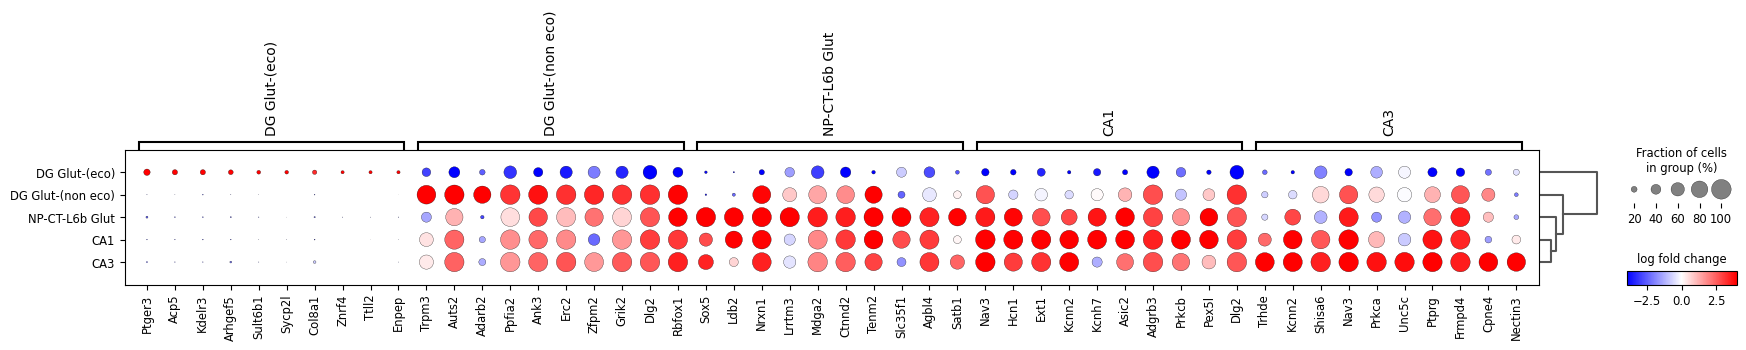

In [57]:
subdata = scdata[scdata.obs.new_anno.isin(['DG Glut-(eco)','NP-CT-L6b Glut', 'DG Glut-(non eco)', 'CA1','CA3'])]

sc.tl.dendrogram(subdata, 'new_anno')
sc.tl.rank_genes_groups(subdata, groupby = 'new_anno', 
                        use_raw=True)


sc.pl.rank_genes_groups_dotplot(subdata,
                                groupby = 'new_anno',
                                n_genes=10,
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=3,    
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')

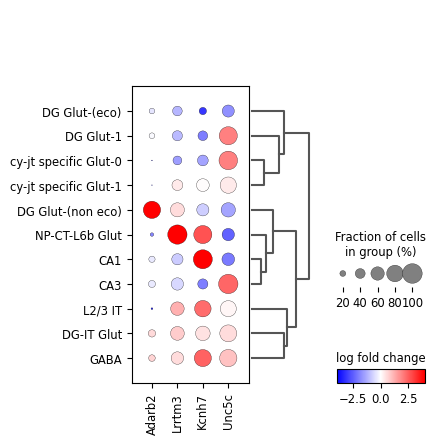

In [52]:
sc.pl.rank_genes_groups_dotplot(scdata, var_names= ['Adarb2','Lrrtm3','Kcnh7','Unc5c'],
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=3,    
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')

## 将 gene expression 替换成  gene activity 数据

In [81]:
gadata = sc.read_h5ad(r'D:\sly_data\ga_merge.h5ad') 
scdata = sc.read_h5ad('final_hvg.h5ad')

In [82]:
new_index = []
for ele in scdata.obs.index.values:
    a,b = ele.split('HM-')
    new_index.append('_'.join([a.lower(),b]))
new_index = np.array(new_index) 

mutual_idx = np.intersect1d(new_index, gadata.obs.index.values)
print(mutual_idx.shape)

(18722,)


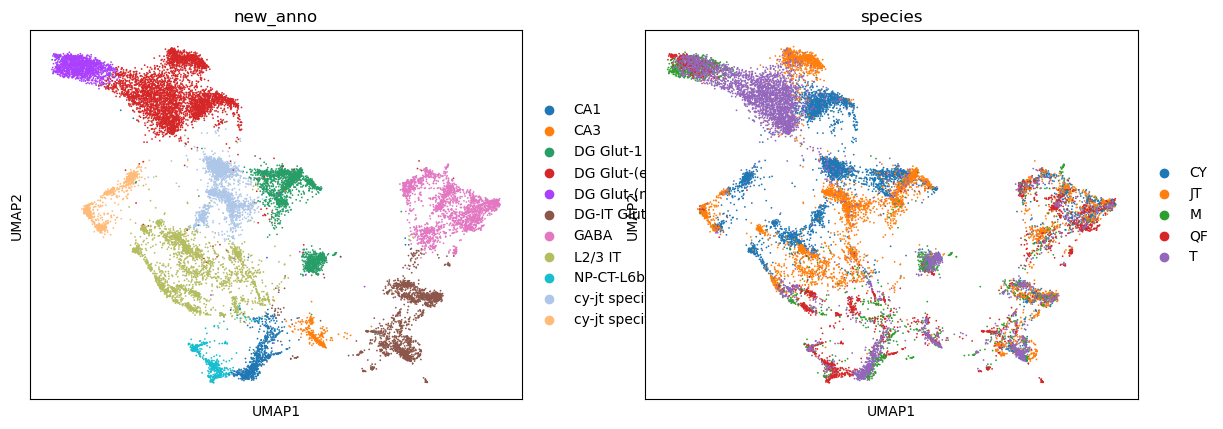

In [83]:
scdata.obs.index = new_index
scdata = scdata[mutual_idx,:]
gadata = gadata[mutual_idx,:]

#gadata.obs.loc[:,'new_anno'] = scdata.obs.loc[:,'new_anno'].values 

scdata = ad.AnnData(X = gadata.raw.X, obs = scdata.obs, var = gadata.raw.var, 
                    obsm=scdata.obsm, obsp = scdata.obsp)
sc.pl.umap(scdata, color = ['new_anno', 'species'])

In [78]:
gadata

AnnData object with n_obs × n_vars = 18722 × 4000
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'species', 'n_genes', 'leiden', 'new_anno'
    var: 'gene_symbol', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'species_colors', 'umap', 'new_anno_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

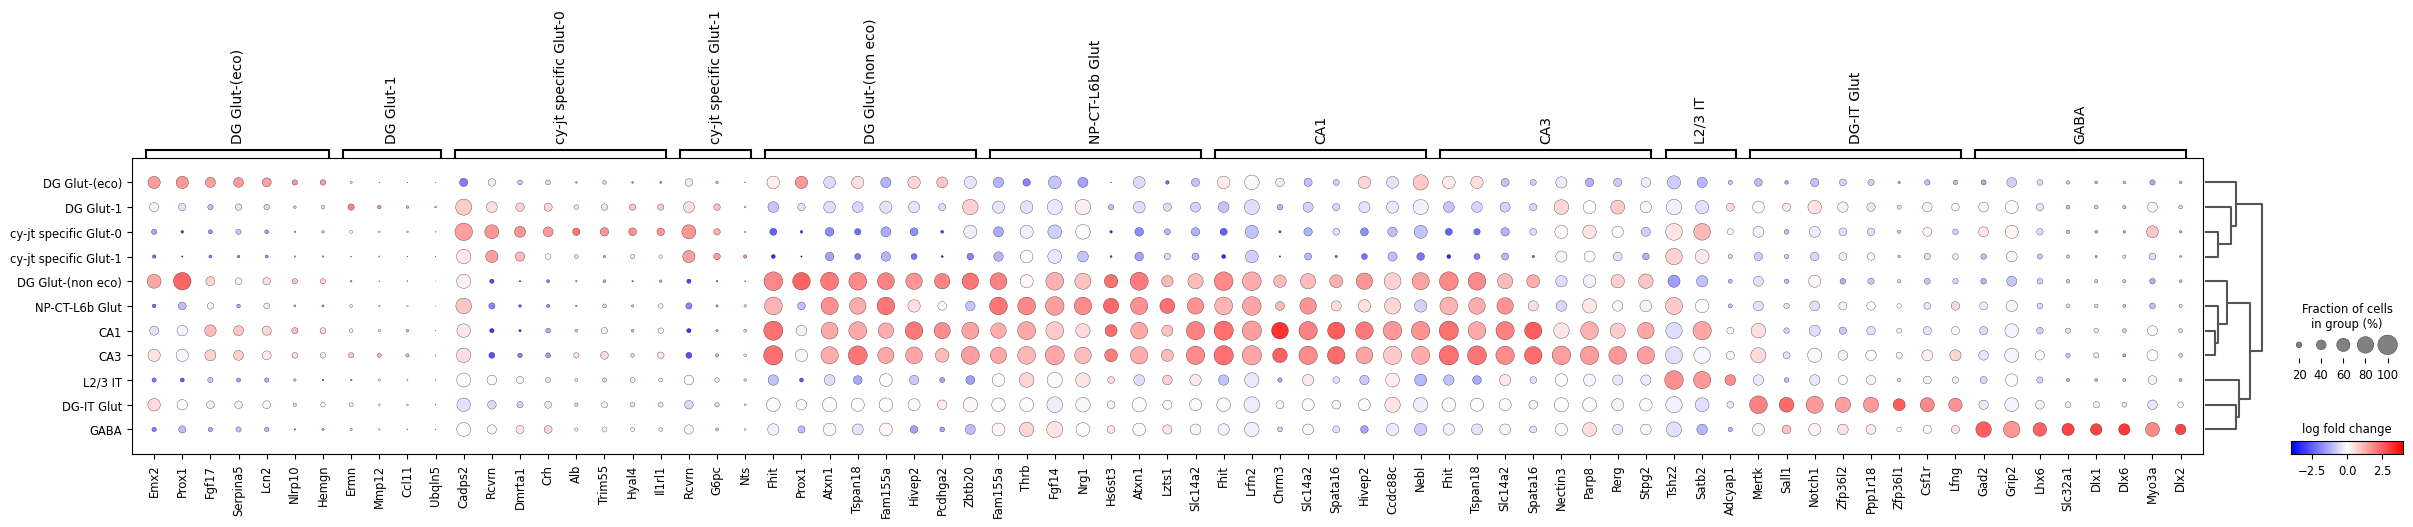

In [89]:
sc.tl.rank_genes_groups(scdata, groupby = 'new_anno')


sc.pl.rank_genes_groups_dotplot(scdata,
                                n_genes=8,
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=1.5,    
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')


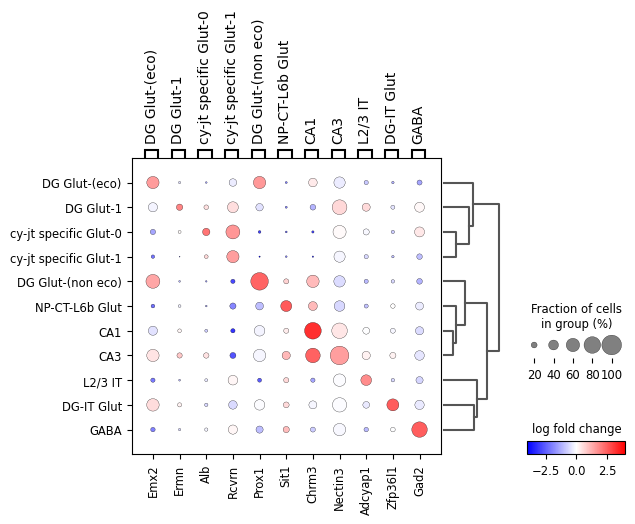

In [92]:
marker_dic = {
    'DG Glut-(eco)': ['Emx2'],
    'DG Glut-1': ['Ermn'], #'Trhde', 
    'cy-jt specific Glut-0': ['Alb'],
    'cy-jt specific Glut-1': ['Rcvrn'],
    'DG Glut-(non eco)': ['Prox1'],
    'NP-CT-L6b Glut': ['Sit1'], #Sox5
    'CA1': ['Chrm3'],
    'CA3': ['Nectin3'],
    'L2/3 IT': ['Adcyap1'],
    'DG-IT Glut': ['Zfp36l1'],
    'GABA': ['Gad2'],
}


#scdata.obs['new_anno'] = scdata.obs['new_anno'].cat.reorder_categories(
#    ['L2/3 IT', 'DG-IT Glut', 'GABA', 'cy-jt specific Glut-0',
#     'cy-jt specific Glut-1', 'DG Glut-1','DG Glut-(eco)', 'NP-CT-L6b Glut',
#     'DG Glut-(non eco)', 'CA1','CA3'],
#     ordered = True
#)

sc.pl.rank_genes_groups_dotplot(
    scdata,
    var_names=marker_dic,
    values_to_plot="logfoldchanges",
    cmap='bwr',
    vmin=-4,
    vmax=4,
    min_logfoldchange=3,
    colorbar_title='log fold change',
)

## gene activation * gene expression

In [104]:
gadata = sc.read_h5ad(r'D:\sly_data\ga_merge.h5ad') 
scdata = sc.read_h5ad('final_hvg.h5ad')

new_index = []
for ele in scdata.obs.index.values:
    a,b = ele.split('HM-')
    new_index.append('_'.join([a.lower(),b]))
new_index = np.array(new_index) 

mutual_idx = np.intersect1d(new_index, gadata.obs.index.values)
print(mutual_idx.shape)



(18722,)


In [105]:
mutual_genes = np.intersect1d(scdata.raw.var.index.values, gadata.raw.var.index.values)
print(mutual_genes.shape)

scdata.obs.index = new_index

scdata = scdata[mutual_idx]
gadata = gadata[mutual_idx]

obs_info = scdata.obs.copy()

gene_exp = scdata.raw[:,mutual_genes].X 
gene_act = gadata.raw[:,mutual_genes].X

scdata_obs = scdata.obs.copy()
scdata_umap = scdata.obsm['X_umap']

scdata = ad.AnnData(X = gene_exp.multiply( gene_act), 
                    obs = scdata_obs, 
                    )

scdata.var.index = mutual_genes 
scdata.obsm['X_umap'] = scdata_umap 
scdata

#scdata = scdata.raw.to_adata()[mutual_idx, mutual_genes]
#gadata = gadata.raw.to_adata()[mutual_idx, mutual_genes]


#scdata = ad.AnnData(X = gadata.raw.X, obs = scdata.obs, var = gadata.raw.var, 
#                   obsm=scdata.obsm, obsp = scdata.obsp)

(9909,)


AnnData object with n_obs × n_vars = 18722 × 9909
    obs: 'species', 'tissues', 'samples', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster', 'celltype', 'coarse_celltype', 'eco', 'leiden_R', 'new_leiden', 'new_anno'
    obsm: 'X_umap'

         Falling back to preprocessing with `sc.pp.pca` and default params.


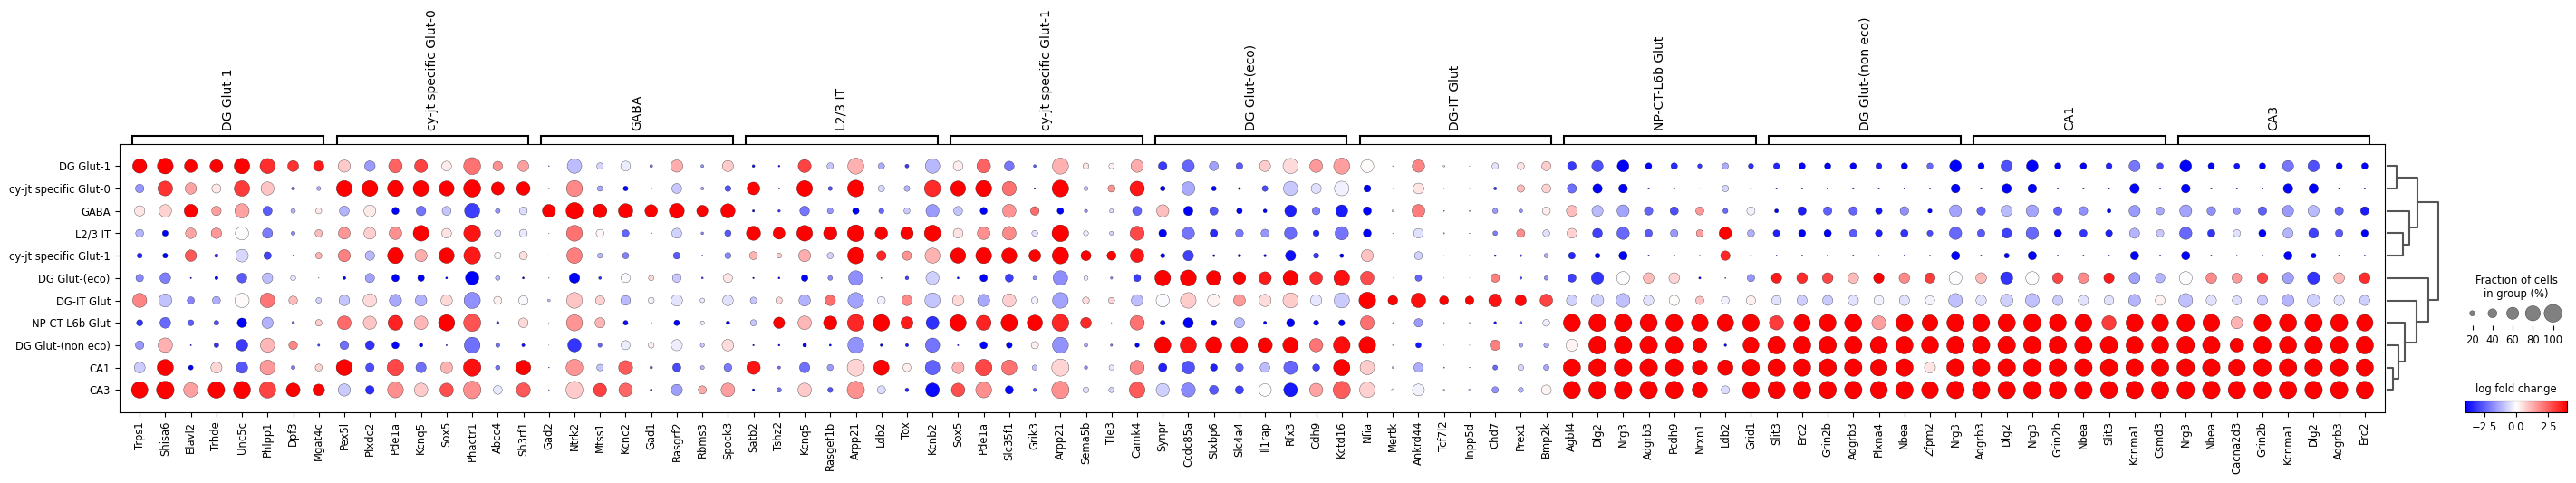

In [ ]:
sc.tl.rank_genes_groups(scdata, groupby = 'new_anno')


sc.pl.rank_genes_groups_dotplot(scdata,
                                n_genes=8,
                                values_to_plot="logfoldchanges", 
                                cmap='bwr',
                                min_logfoldchange=1.5,    
                                vmin=-4,
                                vmax=4,
                                colorbar_title='log fold change')


In [ ]:
mutual_genes 

scdata.obs.index = new_index
scdata = scdata[mutual_idx,:]
gadata = gadata[mutual_idx,:]

#gadata.obs.loc[:,'new_anno'] = scdata.obs.loc[:,'new_anno'].values 

scdata = ad.AnnData(X = gadata.raw.X, obs = scdata.obs, var = gadata.raw.var, 
                    obsm=scdata.obsm, obsp = scdata.obsp)
sc.pl.umap(scdata, color = ['new_anno', 'species'])